# 결정트리

- 스무고개처럼, 특성의 값에 따라서 클래스별로 분류하는 모델
- 분류할 때는 불순도의 차이가 크도록 분류한다.
  - 지니 불순도
  - 엔트로피 불순도

### 로지스틱 회귀로 와인 분류하기
와인 데이터로 와인의 종류 구별하기
- 알코올, 도수, 당도, pH값

In [9]:
import pandas as pd
import numpy as np

wine = pd.read_csv('https://bit.ly/wine_csv_data')

display(wine.head())
wine['class'].value_counts()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


class
1.0    4898
0.0    1599
Name: count, dtype: int64

- alcohol : 알코올 도수
- sugar   : 당도
- pH      : pH값
- class   : 0이면 레드와인, 1이면 화이트와인

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [10]:
np.round(wine.describe(), 2)

,alcohol,sugar,pH,class
count,6497.00,6497.00,6497.00,6497.00
mean,10.49,5.44,3.22,0.75
std,1.19,4.76,0.16,0.43
min,8.00,0.60,2.72,0.00
25%,9.50,1.80,3.11,1.00
50%,10.30,3.00,3.21,1.00
75%,11.30,8.10,3.32,1.00
max,14.90,65.80,4.01,1.00


In [15]:
# 데이터를 훈련세트와 테스트 세트로 분할
from sklearn.model_selection import train_test_split

wine_feature = wine.iloc[:, :3]
wine_target = wine.iloc[:, 3]

train_input, test_input, train_target, test_target = train_test_split(wine_feature, wine_target, test_size=0.2, random_state=42)

In [19]:
# 특성 데이터 표준화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

array([[ 1.44082714,  1.52797084,  0.26967864],
       [-0.48990299, -0.68214836,  0.3323304 ],
       [ 1.27293756,  0.40206106, -0.23153545],
       ...,
       [ 1.60871671, -0.76554908, -0.16888369],
       [-0.90962693,  0.88161523,  0.52028568],
       [-1.49724045,  2.09092573, -1.98578474]])

In [28]:
# 특성 생성
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False)
poly.fit(train_scaled)
train_poly = poly.transform(train_scaled)
test_poly = poly.transform(test_scaled)

In [31]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.8283625168366365
0.8261538461538461


In [51]:
from sklearn.linear_model import SGDClassifier

sg = SGDClassifier(loss='log_loss')
classes = wine_target.unique()


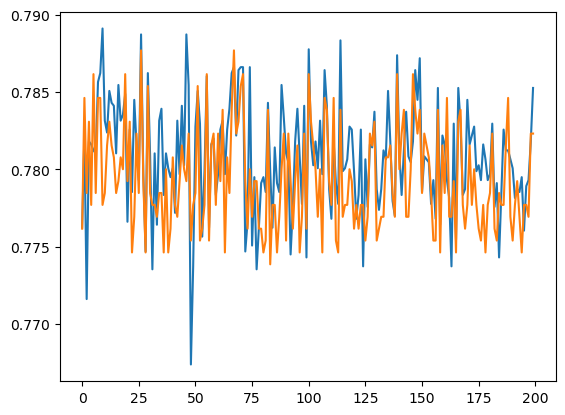

In [53]:
import matplotlib.pyplot as plt

iters = 200

train_scores, test_scores = [], []
for _ in range(iters):
    sg.partial_fit(train_scaled, train_target, classes=classes)
    train_scores.append(sg.score(train_scaled, train_target))
    test_scores.append(sg.score(test_scaled, test_target))

plt.plot(train_scores)
plt.plot(test_scores)


기존의 모델로는 높은 점수를 얻기도 힘들고, 모델의 원리를 이해하기도 어렵다. 결정트리는 이해하기 쉬운 모델이다.

In [77]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

# 과대적합 모델


0.996921300750433
0.8538461538461538


In [108]:
from sklearn.tree import DecisionTreeClassifier

dt2 = DecisionTreeClassifier()
dt2.fit(train_poly, train_target)
print(dt2.score(train_poly, train_target))
print(dt2.score(test_poly, test_target))

#과대적합 모델

0.996921300750433
0.8607692307692307


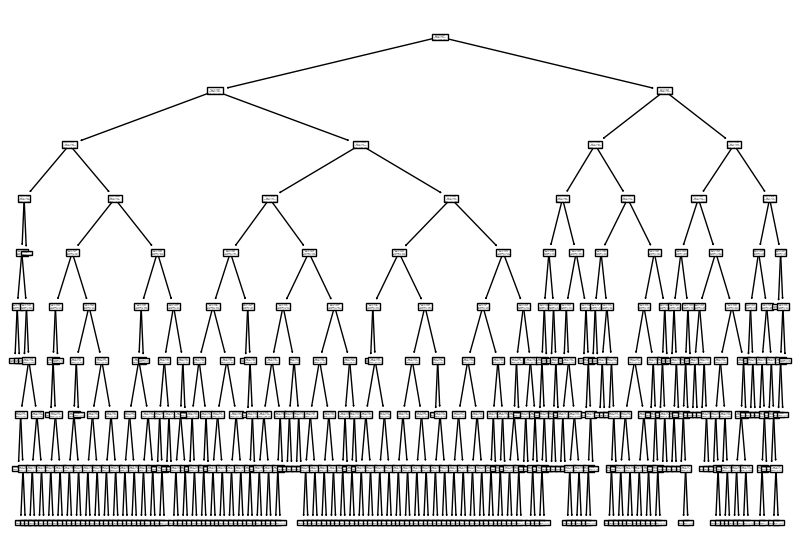

In [109]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()


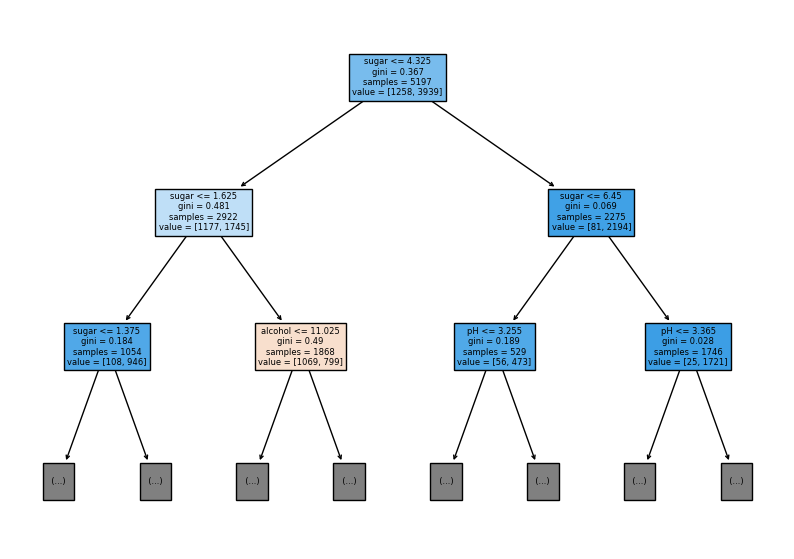

In [110]:
plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=2, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

결정 트리 모델은 부모 노드와 자식 노드들의 불순도 차이가 가능한 크도록 트리를 성장 시킨다.
- gini(지니 불순도) : 1에서 음성 클래스와 양성클래스의 비율을 각각 제곱하여 뺀 값.
- 엔트로피 불순도
- 부모와 자식 노드 사이의 불순도 차이를 정보 이득이라고 한다.

위에서 만들어낸 트리 모델은 제한없이 성장했기 때문에 과대적합 모델이 되었다. 

결정트리 모델에서는 이를 방지하기 위해서 가지치기를 해야한다. 

가장 간단한 가지치기 방법은 트리의 최대 깊이를 지정하는 것이다.

In [89]:
max_depth = 3
dt=DecisionTreeClassifier(max_depth=max_depth, random_state=42)

max_depths = [i for i in range(3, 30)]

train_scores = []
test_scores = []

for max_depth in max_depths:
    dt=DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt.fit(train_scaled, train_target)
    train_scores.append(dt.score(train_scaled, train_target))
    test_scores.append(dt.score(test_scaled, test_target))


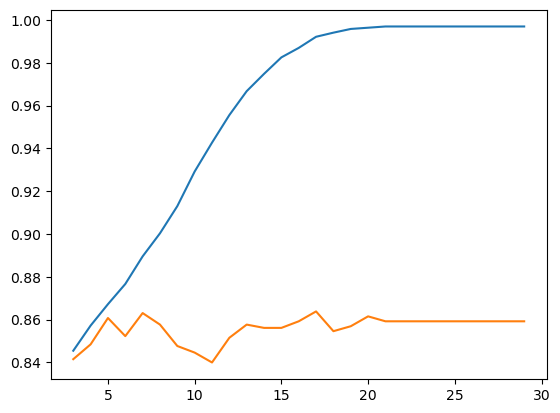

In [90]:
plt.plot(max_depths, train_scores)
plt.plot(max_depths, test_scores)


In [94]:
# 결정 트리 모델에서는 특성의 값에 따라 분류하기 때문에 표준화가 필요 없다.
max_depth = 3
dt=DecisionTreeClassifier(max_depth=max_depth, random_state=42)

max_depths = [i for i in range(3, 10)]

train_scores = []
test_scores = []

for max_depth in max_depths:
    dt=DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt.fit(train_input, train_target)
    train_scores.append(dt.score(train_input, train_target))
    test_scores.append(dt.score(test_input, test_target))

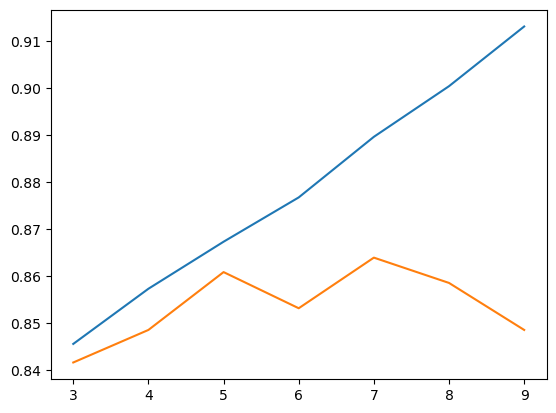

In [95]:
plt.plot(max_depths, train_scores)
plt.plot(max_depths, test_scores)

In [96]:
# 결정 트리 모델에서는 특성의 중요도를 알 수 있다. 가지치기에 따라 달라지므로 주의가 필요하다.
print(dt.feature_importances_)

[0.1903222  0.6247395  0.18493829]
